# Assignment 2: Inverse kinematics of our leg

Use this noteboook to document interacting with the robot class. The primary goal for this assignment is a video recording and plot rendering of your robot leg commanded to move along an *interesting* path (see the bat sign I chose in the readme page). 

__Deliverables__
1. Your leg.py file in the robot python module we are creating. The template provided has blank functions which need to be completed.
2. Two videos, a video of your robot tracing out your commanded trajectory (uploaded to youtube), and a gif of robot commanded trajectory (like on the readme page).
3. This notebook which you will use to send the move commands for the trajectory.


Team #: UNKNOWN

Names: Yangting Sun & Mingchen Mao

# Getting started

In [ ]:
import robot
import scipy.io as spio
import time
import math
import sympy
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
pi = np.pi
from sympy import symbols
from sympy import sin, cos, asin, acos, atan, pi, sqrt, diff
from sympy.utilities.lambdify import lambdify
from sympy import Matrix
# Make a new leg variable which is a robot.Leg class
leg = robot.Leg(False)
leg.get_joint_pos()
print('joint0: %f \t joint1: %f' % (leg.joint_0_pos, leg.joint_1_pos))

# Import trajectory
mat = spio.loadmat('heart.mat', squeeze_me=True)
x = mat['X']
y = mat['Y']
x=np.array(x)
y=-np.array(y)
tt=len(x)

In [ ]:
def draw_leg(theta1, theta2, alpha1, alpha2, ax=False):
    """
    This function takes in the four angles of the leg and draws
    the configuration
    """
    
    link1 = 7.3
    link2 = 14.3
    width = 8
    
    if ax == False:
        ax = plt.gca()
        ax.cla()

    ax.plot(-width / 2, 0, 'ok')
    ax.plot(width / 2, 0, 'ok')

    ax.plot([-width / 2, 0], [0, 0], 'k')
    ax.plot([width / 2, 0], [0, 0], 'k')

    ax.plot(-width / 2 + np.array([0, link1 * cos(theta1)]), [0, link1 * sin(theta1)], 'k')
    ax.plot(width / 2 + np.array([0, link1 * cos(theta2)]), [0, link1 * sin(theta2)], 'k')

    ax.plot(-width / 2 + link1 * cos(theta1) + np.array([0, link2 * cos(alpha1)]), \
            link1 * sin(theta1) + np.array([0, link2 * sin(alpha1)]), 'k');
    ax.plot(width / 2 + link1 * cos(theta2) + np.array([0, link2 * cos(alpha2)]), \
            np.array(link1 * sin(theta2) + np.array([0, link2 * sin(alpha2)])), 'k');
                
    hongx = float(width / 2 + link1 * cos(theta2) + link2 * cos(alpha2))
    hongy = float(np.array(link1 * sin(theta2) + link2 * sin(alpha2)))

    ax.plot(hongx, hongy, 'ro');

    ax.axis([-(link1+link2), (link1+link2), -(link1+link2), (link1+link2)])
    ax.invert_yaxis()

# Your code below!

In [ ]:
# Simulate = True
%matplotlib qt5
leg.set_joint_pos(pi/2, pi/2)

# Compute angles based on trajectories
t0, t1, a0, a1 = leg.move_trajectory(tt,x,y)

for i in range(tt):
    draw_leg(t0[i], t1[i], a0[i], a1[i])
    plt.plot(x[0:i+1], y[0:i+1])
     #plt.show()
    plt.pause(0.16)

In [4]:
from IPython.display import Image
from IPython.display import display
display(Image(url='./simulation.gif'))

In [ ]:
# Simulate = False
theta0, theta1 = np.loadtxt('jiao')
leg.set_home()
for i in range(len(theta0)):
    leg.set_joint_pos(theta0[i], theta1[i])
    time.sleep(.6)

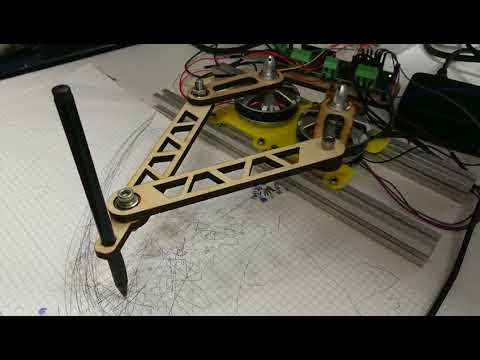

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('DbRCDHyN7UA')